In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
df = pd.read_csv("Retail-data.csv")

In [65]:
#Data Analysis#

In [66]:
pd.set_option("display.max_columns",500)

In [67]:
#displaying the rows in the dataframe
df.sample(5)

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
12400,14-07-2021 17:00,3.926850e+12,5.276140e+12,6.739620e+12,1.89,4.001000e+13,1,3.46,0.0,0.0,3.46,0.0,0.32,3.78,1,1,0,#3397,Sweets & Snacks,Haldiram's Plain Bhujia,Haldiram's,200 g,Point of Sale
30725,29-09-2021 12:00,4.174940e+12,5.280220e+12,0.000000e+00,1.47,0.000000e+00,1,2.42,0.0,0.0,2.42,0.0,0.52,2.94,1,1,0,#6982,NaN,Fresh Green chilli (148 g),NaN,NaN,Point of Sale
68013,08-02-2022 14:00,4.655300e+12,5.944390e+12,6.660290e+12,2.89,3.967850e+13,1,5.30,0.0,0.0,5.30,0.0,0.48,5.78,1,1,0,#14203,"Pulses, Grains & Millets",TRS Chana Dal,TRS,1 kg,Point of Sale
4921,12-06-2021 13:00,3.862860e+12,5.314140e+12,0.000000e+00,23.00,0.000000e+00,1,46.00,0.0,0.0,46.00,0.0,0.00,46.00,1,1,0,#2044,NaN,Mango (2890 g),NaN,NaN,Point of Sale
96781,11-05-2022 17:00,4.752310e+12,5.268860e+12,6.733790e+12,1.99,4.048480e+13,1,3.66,0.0,0.0,3.66,0.0,0.32,3.98,1,1,0,#19497,Sweets & Snacks,Haldiram's Boondi Plain,Haldiram's,200 g,Point of Sale


In [68]:
#checking the number of rows and columns in the dataframe
df.shape

(101929, 23)

In [69]:
#checking the type of values under each column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101929 entries, 0 to 101928
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   hour                    101929 non-null  object 
 1   order_id                101929 non-null  float64
 2   customer_id             101929 non-null  float64
 3   product_id              101929 non-null  float64
 4   product_price           101929 non-null  float64
 5   variant_id              101929 non-null  float64
 6   orders                  101929 non-null  int64  
 7   gross_sales             101929 non-null  float64
 8   discounts               101929 non-null  float64
 9   returns                 101929 non-null  float64
 10  net_sales               101929 non-null  float64
 11  shipping                101929 non-null  float64
 12  taxes                   101929 non-null  float64
 13  total_sales             101929 non-null  float64
 14  ordered_item_quantit

In [70]:
#converting the 'hour' column into DateTime format
df['hour'] = pd.to_datetime(df['hour'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101929 entries, 0 to 101928
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   hour                    101929 non-null  datetime64[ns]
 1   order_id                101929 non-null  float64       
 2   customer_id             101929 non-null  float64       
 3   product_id              101929 non-null  float64       
 4   product_price           101929 non-null  float64       
 5   variant_id              101929 non-null  float64       
 6   orders                  101929 non-null  int64         
 7   gross_sales             101929 non-null  float64       
 8   discounts               101929 non-null  float64       
 9   returns                 101929 non-null  float64       
 10  net_sales               101929 non-null  float64       
 11  shipping                101929 non-null  float64       
 12  taxes                   101929

In [71]:
#checking the statistical parameters of values under each column
df.describe()

,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity
count,1.019290e+05,1.019290e+05,1.019290e+05,101929.000000,1.019290e+05,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000,101929.000000
mean,4.166395e+12,4.646366e+12,5.164254e+12,3.029806,3.107043e+13,0.934925,6.113423,-0.158969,-0.019399,5.935055,0.004022,0.530069,6.469145,1.080939,1.078486,-0.002453
std,1.084800e+12,1.895350e+12,2.765212e+12,3.000681,1.654758e+13,0.246659,6.179441,0.994381,0.674285,6.052408,0.218740,0.701146,6.655866,0.620989,0.626493,0.059214
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-69.500000,-90.060000,-90.060000,-11.480000,-18.920000,-108.980000,0.000000,-7.000000,-7.000000
25%,4.013270e+12,5.269060e+12,5.908390e+12,1.350000,3.696630e+13,1.000000,2.800000,0.000000,0.000000,2.740000,0.000000,0.160000,2.980000,1.000000,1.000000,0.000000
50%,4.580600e+12,5.283720e+12,6.659360e+12,2.390000,3.994250e+13,1.000000,4.720000,0.000000,0.000000,4.560000,0.000000,0.380000,4.980000,1.000000,1.000000,0.000000
75%,4.677140e+12,5.380540e+12,6.747460e+12,3.790000,4.017080e+13,1.000000,7.320000,0.000000,0.000000,7.300000,0.000000,0.660000,7.960000,1.000000,1.000000,0.000000
max,4.766070e+12,6.229830e+12,7.706230e+12,129.000000,4.304960e+13,1.000000,213.220000,0.000000,31.320000,213.220000,11.480000,44.780000,258.000000,24.000000,24.000000,0.000000


In [72]:
#transposing the above readings , for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,101929.0,4.166395e+12,1.084800e+12,0.00,4.013270e+12,4.580600e+12,4.677140e+12,4.766070e+12
customer_id,101929.0,4.646366e+12,1.895350e+12,0.00,5.269060e+12,5.283720e+12,5.380540e+12,6.229830e+12
product_id,101929.0,5.164254e+12,2.765212e+12,0.00,5.908390e+12,6.659360e+12,6.747460e+12,7.706230e+12
product_price,101929.0,3.029806e+00,3.000681e+00,0.00,1.350000e+00,2.390000e+00,3.790000e+00,1.290000e+02
variant_id,101929.0,3.107043e+13,1.654758e+13,0.00,3.696630e+13,3.994250e+13,4.017080e+13,4.304960e+13
orders,101929.0,9.349253e-01,2.466588e-01,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
gross_sales,101929.0,6.113423e+00,6.179441e+00,0.00,2.800000e+00,4.720000e+00,7.320000e+00,2.132200e+02
discounts,101929.0,-1.589695e-01,9.943808e-01,-69.50,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
returns,101929.0,-1.939880e-02,6.742853e-01,-90.06,0.000000e+00,0.000000e+00,0.000000e+00,3.132000e+01
net_sales,101929.0,5.935055e+00,6.052408e+00,-90.06,2.740000e+00,4.560000e+00,7.300000e+00,2.132200e+02


In [73]:
#checking the count of null values 
df.isnull().sum()

hour                          0
order_id                      0
customer_id                   0
product_id                    0
product_price                 0
variant_id                    0
orders                        0
gross_sales                   0
discounts                     0
returns                       0
net_sales                     0
shipping                      0
taxes                         0
total_sales                   0
ordered_item_quantity         0
net_quantity                  0
returned_item_quantity        0
order_name                 5961
product_type              22861
product_title              6483
product_vendor            22366
variant_title             31316
api_client_title           5961
dtype: int64

In [74]:
#checking the unique values under each column
for col in list(df):
    print(f"{col} ---->{df[col].nunique()}")

hour ---->8855
order_id ---->10767
customer_id ---->1038
product_id ---->803
product_price ---->1177
variant_id ---->699
orders ---->2
gross_sales ---->1376
discounts ---->395
returns ---->138
net_sales ---->1506
shipping ---->6
taxes ---->375
total_sales ---->1577
ordered_item_quantity ---->18
net_quantity ---->23
returned_item_quantity ---->6
order_name ---->19374
product_type ---->16
product_title ---->8074
product_vendor ---->174
variant_title ---->188
api_client_title ---->4


In [75]:
#26/11/2022# - Data Manipulation 

In [76]:
#Customer Analysis

In [77]:
# 1.Find out the avg. orders and avg. totalsales per customers?

df = df.loc[df.orders==1]
   
total_orders = df['orders'].sum()
total_sales = df['total_sales'].sum()

print(total_orders,total_sales)

avg_orders = pd.DataFrame(df.groupby('customer_id')['orders'].sum().div (95296).round(5)*100)
avg_totalsales = pd.DataFrame(df.groupby('customer_id')['total_sales'].sum().div (660543.24).round(5)*100)

avg_orders_totalsales = pd.merge(left=avg_orders,right=avg_totalsales,on='customer_id',how='inner')
avg_orders_totalsales

avg_orders_totalsales.rename(columns={'customer_id':'customer','orders':'avg_orders(nos.)','total_sales':'avg_totalsales($)'},inplace='True')
avg_orders_totalsales.sort_values(by = 'avg_totalsales($)',ascending = False).reset_index
sorted_avg_orders_totalsales = avg_orders_totalsales.sort_values(by = 'avg_totalsales($)',ascending = False)
print(sorted_avg_orders_totalsales.head(10))


95296 660543.24
              avg_orders(nos.)  avg_totalsales($)
customer_id                                      
0.000000e+00             8.730              7.489
5.274140e+12             0.650              0.731
5.278330e+12             0.680              0.689
5.283300e+12             0.679              0.682
5.268980e+12             0.742              0.682
3.980040e+12             0.732              0.669
5.269050e+12             0.590              0.635
5.268610e+12             0.640              0.630
5.283840e+12             0.565              0.617
5.294130e+12             0.576              0.612


Text(0.5, 1.0, 'Avg Orders and Avg Total Sales per Customer')

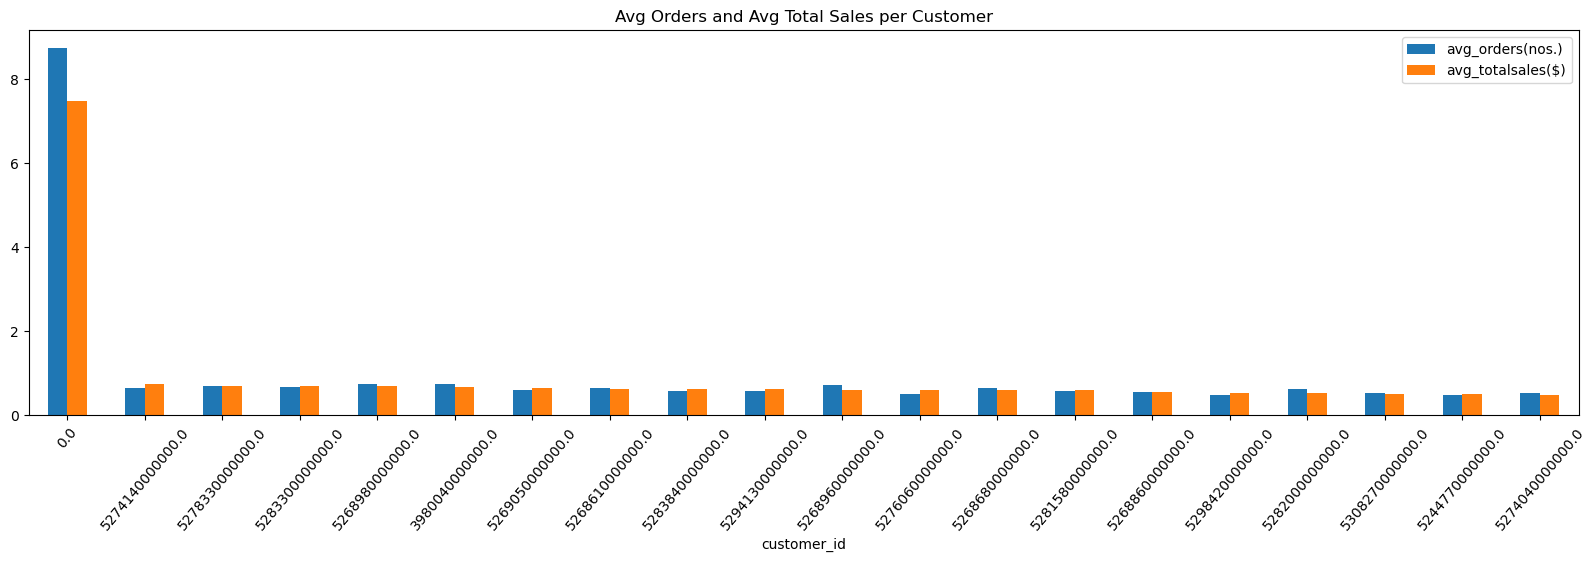

In [78]:
sorted_avg_orders_totalsales.head(20).plot(kind='bar',figsize=(20,5))
plt.xticks(rotation = 50)
plt.title("Avg Orders and Avg Total Sales per Customer")

In [79]:
# 2.Find out the customer first and last purchase to identity the no of days the customer is with us?

last_date = pd.DataFrame(df.groupby('customer_id')['hour'].max())
first_date = pd.DataFrame(df.groupby('customer_id')['hour'].min())
last_first_date = pd.merge(left=last_date,right=first_date,on='customer_id',how='inner')
duration = last_first_date['hour_x']-last_first_date['hour_y']
last_first_date['duration']=duration
last_first_date
last_first_date.rename(columns = {'customer_id':'customer','hour_x':'last date','hour_y':'first date'}, inplace = True)
last_first_date

,last date,first date,duration
customer_id,,,
0.000000e+00,2022-12-05 18:00:00,2021-01-06 15:00:00,698 days 03:00:00
3.949750e+12,2022-09-04 19:00:00,2021-01-06 20:00:00,605 days 23:00:00
3.978020e+12,2022-12-02 13:00:00,2021-02-10 11:00:00,660 days 02:00:00
3.978050e+12,2021-10-07 20:00:00,2021-10-07 20:00:00,0 days 00:00:00
3.980040e+12,2022-12-03 13:00:00,2021-01-08 16:00:00,693 days 21:00:00
...,...,...,...
6.224930e+12,2022-05-26 11:00:00,2022-05-22 12:00:00,3 days 23:00:00
6.225480e+12,2022-05-22 20:00:00,2022-05-22 20:00:00,0 days 00:00:00
6.227300e+12,2022-05-24 13:00:00,2022-05-24 13:00:00,0 days 00:00:00


<AxesSubplot:xlabel='customer_id', ylabel='duration'>

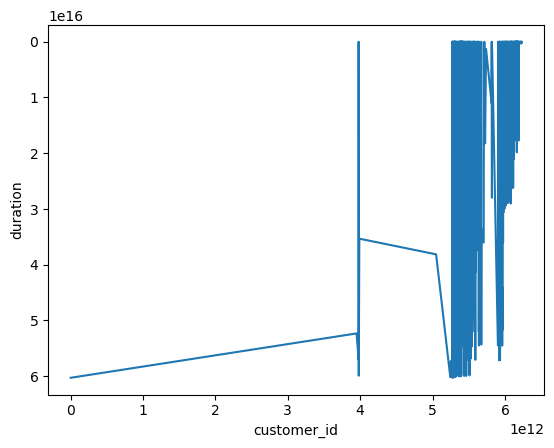

In [80]:
sns.lineplot(x="customer_id", y="duration",     
             data=last_first_date)

In [81]:
# 3.Find out the Customer purchase frequency?

df.drop_duplicates(subset = 'order_id',keep = 'first',inplace = False)
frequency = pd.DataFrame(df.groupby('customer_id')['order_id'].count())
frequency

,order_id
customer_id,
0.000000e+00,8319
3.949750e+12,30
3.978020e+12,120
3.978050e+12,3
3.980040e+12,698
...,...
6.224930e+12,20
6.225480e+12,16
6.227300e+12,1


Text(0.5, 1.0, 'Customer Purchase Frequency')

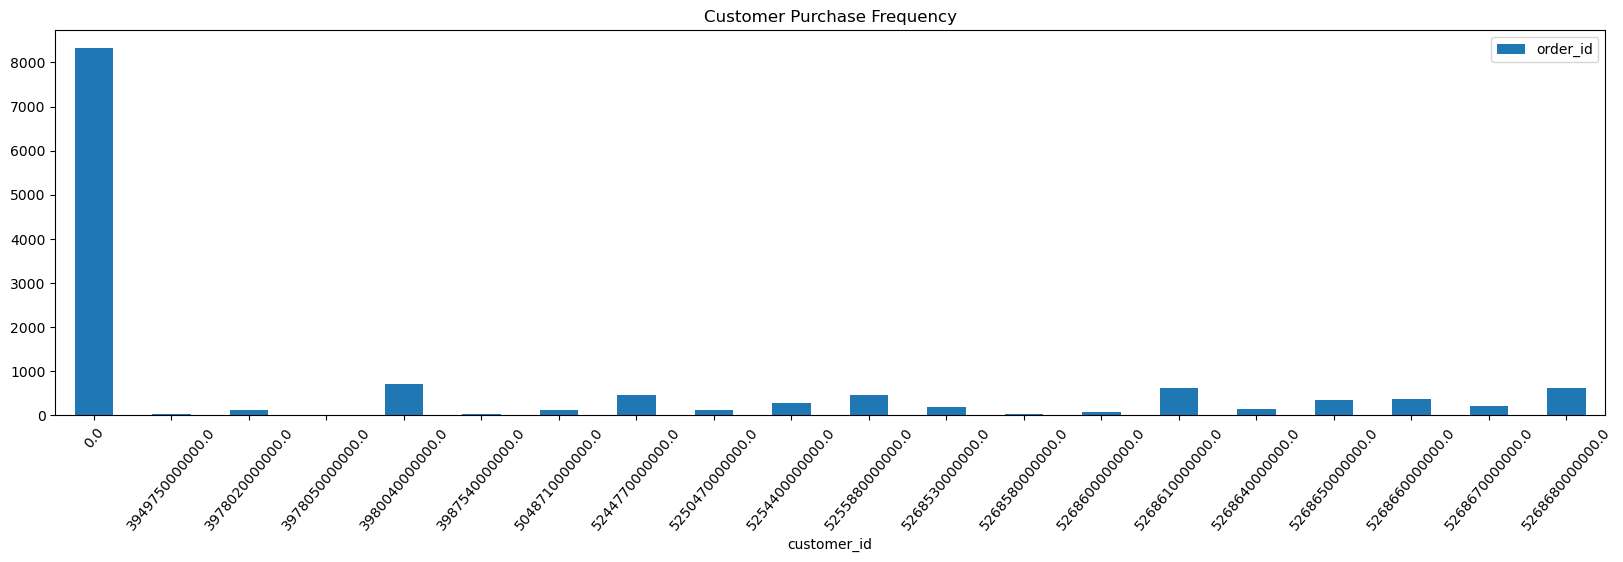

In [82]:
frequency.head(20).plot(kind='bar',figsize=(20,5))
plt.xticks(rotation = 50)
plt.title("Customer Purchase Frequency")


In [83]:
# 4.What is the highest and least purchases done by the customers?

df = df.loc[df.orders==1]

hi_purchase = df.groupby(['customer_id'])[['total_sales']].max()
low_purchase = df.groupby(['customer_id'])[['total_sales']].min()
hi_low_purchase = pd.merge(left=hi_purchase,right=low_purchase,on='customer_id',how='inner')
hi_low_purchase
hi_low_purchase.rename(columns={'total_sales_x':'highest_purchase','total_sales_y':'lowest_purchase'},inplace='True')
hi_low_purchase


,highest_purchase,lowest_purchase
customer_id,,
0.000000e+00,146.86,0.00
3.949750e+12,31.96,0.00
3.978020e+12,16.58,0.00
3.978050e+12,3.78,1.78
3.980040e+12,39.98,0.00
...,...,...
6.224930e+12,21.90,3.68
6.225480e+12,16.98,2.98
6.227300e+12,29.50,29.50


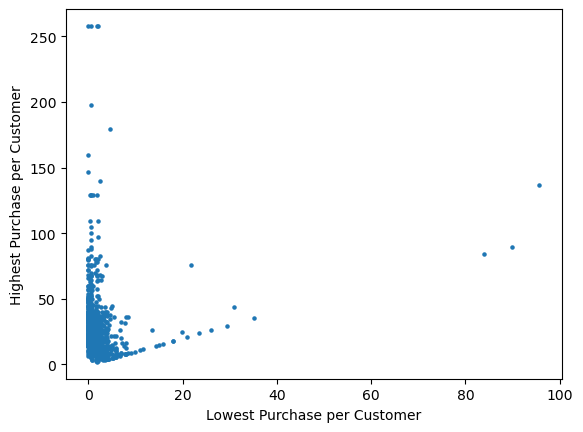

In [84]:
plt.scatter(x='lowest_purchase',y='highest_purchase',s=5,data =hi_low_purchase)
plt.xlabel('Lowest Purchase per Customer')
plt.ylabel('Highest Purchase per Customer')
plt.show()

Text(0.5, 1.0, 'Customer-wise Highest and Lowest Purchases')

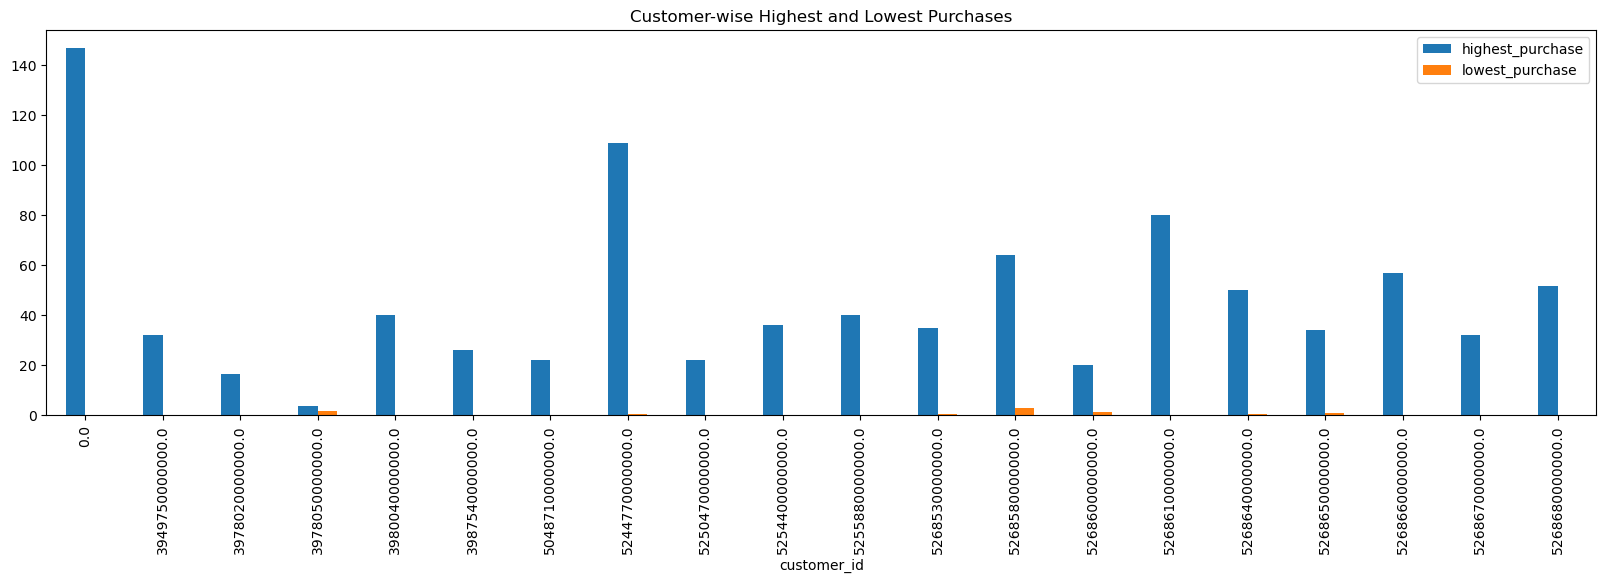

In [85]:
hi_low_purchase.head(20).plot(kind='bar',figsize=(20,5));
plt.title("Customer-wise Highest and Lowest Purchases")

In [86]:
# 5.No of days difference between each purchase made by customers?

In [87]:
# 6.Most purchased product by a customer?

df = df.loc[df.orders==1]
most_purchased_product = (df.groupby(['customer_id','product_title'])['product_title'].agg(['count']).sort_values(by='count', ascending=False).reset_index().drop_duplicates('customer_id', keep='first'))
most_purchased_product

,customer_id,product_title,count
0,0.000000e+00,Dbanyan Tas,158
14,5.268980e+12,Garam Idly Dosa Batter,37
18,5.268680e+12,Coriander Leaves (Per stuk),35
24,5.276120e+12,Garam Idly Dosa Batter,33
25,5.314380e+12,Haldiram's Gobhi Paratha (Frozen),32
...,...,...,...
60502,5.283580e+12,Kohinoor Royale Authentic Basmati Rice,1
60552,5.283260e+12,24 Mantra Organic Black Pepper (Whole),1
60571,5.283270e+12,Kohinoor Extra Long Gold Basmati Rice,1
60572,5.283290e+12,Daily Delight - Okra Cut,1


<AxesSubplot:xlabel='product_title', ylabel='count'>

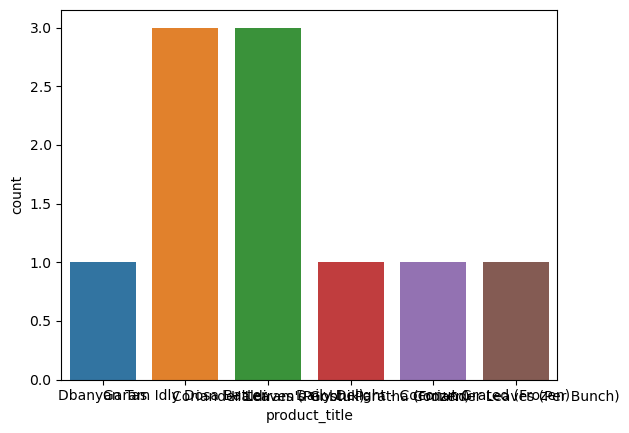

In [88]:
sns.countplot(x='product_title',data=most_purchased_product.head(10))

In [89]:
# 7.Find the Top 5 customers with most orders?

df = df.loc[df.orders==1]
cust_most_order = df.groupby('customer_id')[['orders']].sum().sort_values(by='orders',ascending=False).reset_index()
cust_most_order.head()

,customer_id,orders
0,0.000000e+00,8319
1,5.268980e+12,707
2,3.980040e+12,698
3,5.268960e+12,680
4,5.278330e+12,648


Text(0.5, 1.0, '5 Customers who has purchased the most with the number of purchases')

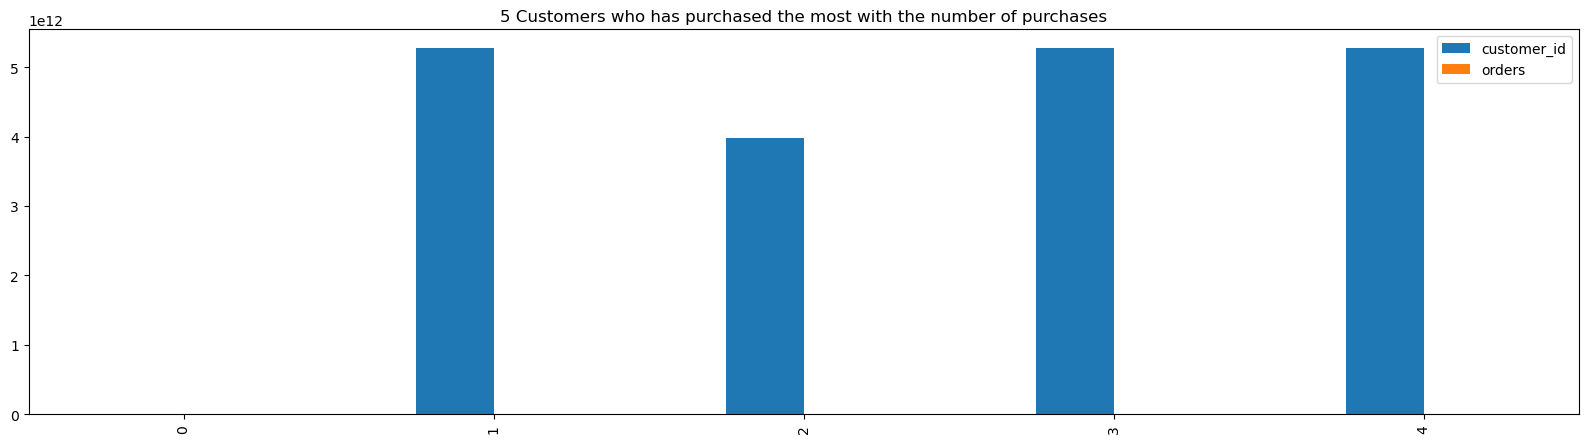

In [90]:
cust_most_order.head().plot(kind='bar',figsize=(20,5));
plt.title("5 Customers who has purchased the most with the number of purchases")